In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
cardio_df = pd.read_csv("..\data\\processed\cardio_data_processed.csv")
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,cluster
0,50,1,168,62.0,110,80,1,1,0,0,1,0,1
1,55,0,156,85.0,140,90,3,1,0,0,1,1,2
2,52,0,165,64.0,130,70,3,1,0,0,0,1,2
3,48,1,169,82.0,150,100,1,1,0,0,1,1,1
4,48,0,156,56.0,100,60,1,1,0,0,0,0,0


In [5]:
from pycaret.classification import *
s = setup(cardio_df, target="cardio", train_size=0.8, fold=3)

,Description,Value
0,Session id,3637
1,Target,cardio
2,Target type,Binary
3,Original data shape,"(64946, 14)"
4,Transformed data shape,"(64946, 14)"
5,Transformed train set shape,"(51956, 14)"
6,Transformed test set shape,"(12990, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [6]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7703,0.8453,0.7045,0.8187,0.7573,0.5416,0.5472,0.2300
gbc,Gradient Boosting Classifier,0.7630,0.8345,0.6799,0.8236,0.7448,0.5274,0.5359,1.1367
rf,Random Forest Classifier,0.7595,0.8295,0.7225,0.7873,0.7534,0.5196,0.5214,0.6367
ridge,Ridge Classifier,0.7552,0.8103,0.6749,0.8122,0.7372,0.5117,0.5194,0.0433
lda,Linear Discriminant Analysis,0.7552,0.8103,0.6749,0.8122,0.7372,0.5118,0.5195,0.0500
ada,Ada Boost Classifier,0.7533,0.8115,0.6733,0.8097,0.7352,0.5079,0.5155,0.4267
lr,Logistic Regression,0.7499,0.8059,0.6998,0.7852,0.7401,0.5007,0.5037,1.2833
et,Extra Trees Classifier,0.7499,0.8240,0.7245,0.7701,0.7466,0.5001,0.5010,0.6333
nb,Naive Bayes,0.7394,0.7946,0.6468,0.8026,0.7163,0.4805,0.4901,0.5900
qda,Quadratic Discriminant Analysis,0.7351,0.7949,0.6265,0.8096,0.7064,0.4721,0.4850,0.0633


c:\Users\vini_\cardio-desease\.venv\lib\site-packages\pycaret\internal\pycaret_experiment\supervised_experiment.py:323: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  master_display_.apply(


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [28]:
X = cardio_df.drop('cardio', axis=1)
y = cardio_df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar las dimensiones
print(f'Tamaño de X_train: {X_train.shape}')
print(f'Tamaño de X_test: {X_test.shape}')
print(f'Tamaño de y_train: {y_train.shape}')
print(f'Tamaño de y_test: {y_test.shape}')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Tamaño de X_train: (45462, 12)
Tamaño de X_test: (19484, 12)
Tamaño de y_train: (45462,)
Tamaño de y_test: (19484,)


In [29]:
logistic_model = LogisticRegression()

In [30]:
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Accuracy: 0.7551324163416137
              precision    recall  f1-score   support

           0       0.71      0.83      0.77      9530
           1       0.81      0.68      0.74      9954

    accuracy                           0.76     19484
   macro avg       0.76      0.76      0.75     19484
weighted avg       0.76      0.76      0.75     19484



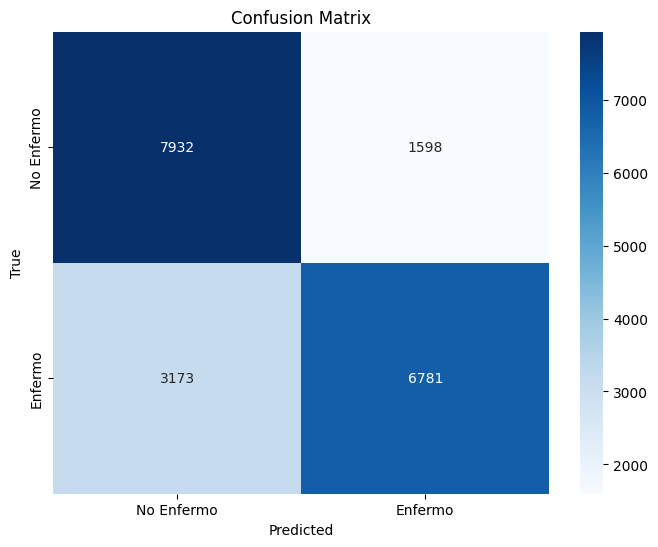

In [31]:
y_pred = logistic_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Enfermo', 'Enfermo'], yticklabels=['No Enfermo', 'Enfermo'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()